<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Solution-1" data-toc-modified-id="Solution-1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Solution 1</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Checking-the-level-of-independence-between-both-groups" data-toc-modified-id="Checking-the-level-of-independence-between-both-groups-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Checking the level of independence between both groups</a></span></li></ul></li></ul></li><li><span><a href="#Solution-2" data-toc-modified-id="Solution-2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Solution 2</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Barplots-on-numeric-columns" data-toc-modified-id="Barplots-on-numeric-columns-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Barplots on numeric columns</a></span></li><li><span><a href="#Barplot-on-character-columns" data-toc-modified-id="Barplot-on-character-columns-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Barplot on character columns</a></span></li></ul></li></ul></li><li><span><a href="#Solution-3" data-toc-modified-id="Solution-3-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Solution 3</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Number-of-unique-users" data-toc-modified-id="Number-of-unique-users-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Number of unique users</a></span></li><li><span><a href="#Number-of-paying-users-among-users-registered-this-month" data-toc-modified-id="Number-of-paying-users-among-users-registered-this-month-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>Number of paying users among users registered this month</a></span></li><li><span><a href="#Average-daily-active-users-per-month" data-toc-modified-id="Average-daily-active-users-per-month-3.0.3"><span class="toc-item-num">3.0.3&nbsp;&nbsp;</span>Average daily active users per month</a></span></li><li><span><a href="#Percentage-of-users-who-made-their-first-payment-in-3-days-after-installation" data-toc-modified-id="Percentage-of-users-who-made-their-first-payment-in-3-days-after-installation-3.0.4"><span class="toc-item-num">3.0.4&nbsp;&nbsp;</span>Percentage of users who made their first payment in 3 days after installation</a></span></li><li><span><a href="#Percentage-of-users-who-made-their-first-payment-in-3-days-after-installation-and-had-at-least-2-battles-in-7-days-after-installation" data-toc-modified-id="Percentage-of-users-who-made-their-first-payment-in-3-days-after-installation-and-had-at-least-2-battles-in-7-days-after-installation-3.0.5"><span class="toc-item-num">3.0.5&nbsp;&nbsp;</span>Percentage of users who made their first payment in 3 days after installation and had at least 2 battles in 7 days after installation</a></span></li><li><span><a href="#Average-lag-(in-days)-between-purchases-per-user" data-toc-modified-id="Average-lag-(in-days)-between-purchases-per-user-3.0.6"><span class="toc-item-num">3.0.6&nbsp;&nbsp;</span>Average lag (in days) between purchases per user</a></span></li></ul></li></ul></li></ul></div>

  <br><center style="font-family:Segoe Print;font-size:1.95em;color:maroon;font-style:bold"> Business Data Scientist test solution </center>
 ![](https://cdn1.dotesports.com/wp-content/uploads/2020/06/08094805/sandsoft-logo-768x265.jpg) 
 <br>
  **Juan Pablo Delzo Melendez**
  
  Note:The solution was done in R  

In [1]:
library(dplyr)
library(skimr)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'skimr' was built under R version 3.6.3"

## Solution 1

In [2]:
library(car)#U de Mann-Whitney  
library(nortest)# Kolmogorov-Smirnov
library(MASS)#Correlation analysis

Loading required package: carData

Attaching package: 'car'

The following object is masked from 'package:dplyr':

    recode


Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select



In [3]:
payments = read.csv("ab_test.csv")
colnames(payments)[1]= "group_A"
head(payments)

group_A,group_B
21,21
18,12
12,8
8,22
20,5
8,24


In [4]:
skim(payments)

-- Data Summary ------------------------
                           Values  
Name                       payments
Number of rows             89      
Number of columns          2       
_______________________            
Column type frequency:             
  numeric                  2       
________________________           
Group variables            None    

-- Variable type: numeric ------------------------------------------------------
# A tibble: 2 x 11
  skim_variable n_missing complete_rate  mean    sd    p0   p25   p50   p75
* <chr>             <int>         <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
1 group_A               0             1  17.2  6.92     5    12    17    21
2 group_B               0             1  19.2 14.8      5    11    17    21
   p100 hist 
* <dbl> <chr>
1    40 <U+2586><U+2587><U+2586><U+2581><U+2581>
2    70 <U+2587><U+2585><U+2581><U+2581><U+2581>


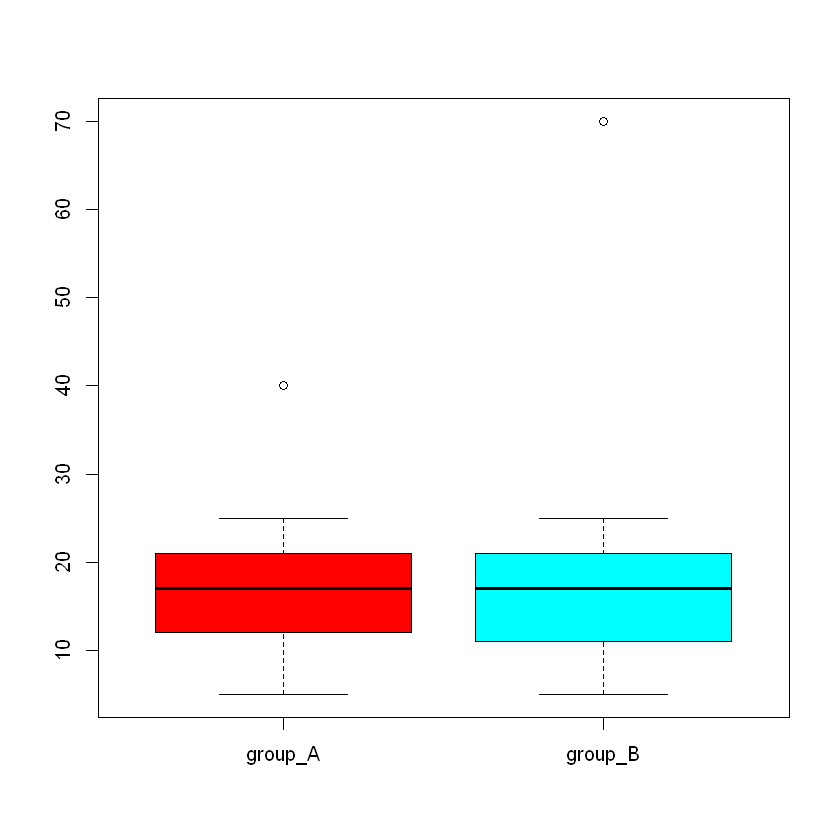

In [5]:
boxplot(payments,col=rainbow(ncol(payments)))

The means are similar but the medians are equal.

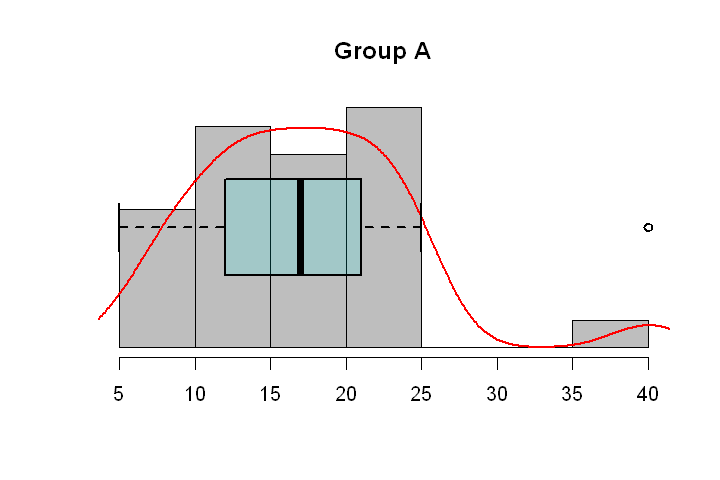

In [6]:
#GROUP A
options(repr.plot.width=6,repr.plot.height=4)
# Histogram
hist(payments$group_A, probability = T, xlab = "", ylab="", col = "grey",
     axes = F, main = "Group A")
# Axis
axis(1)
# Density
lines(density(payments$group_A), col = "red", lwd = 2)
# Add boxplot
par(new = T)
boxplot(payments$group_A, horizontal = T, axes = F,
        lwd = 2, col = rgb(0, 1, 1, alpha = 0.15))

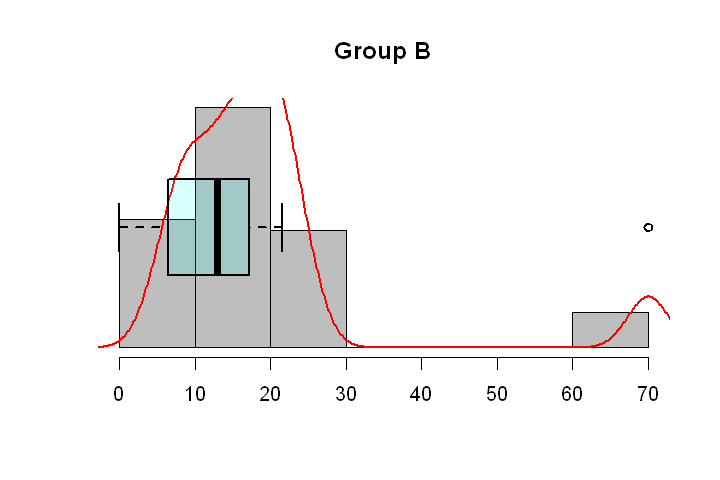

In [7]:
#GROUP B
options(repr.plot.width=6,repr.plot.height=4)
# Histogram
hist(payments$group_B, probability = T, xlab = "", ylab="", col = "grey",
     axes = F, main = "Group B")
# Axis
axis(1)
# Density
lines(density(payments$group_B), col = "red", lwd = 2)
# Add boxplot
par(new = T)
boxplot(payments$group_B, horizontal = T, axes = F,
        lwd = 2, col = rgb(0, 1, 1, alpha = 0.15))

#### Checking the level of independence between both groups

In [8]:
cor(payments$group_A,payments$group_B)

[1] -0.1753616

- Being demanding, the group A wants to approach to fit a Normal Distribution but Group B's fit is really poor. 
- According to the correlation grade,I can say they practically behave indepedent of each other <br> <br>
The method to tackle the analysis is based on the following diagram:

![](Diagramaflujoanalisisdemedias.png)

Search: https://www.youtube.com/watch?v=YPTi65ub7K8&list=LL&index=3&t=6s

Initially I assumed the `payments`  fulfills the rules of Parametric Statistic. It's to say that they fit a Normal Distribution.Under that I apply Kolmogorov-Smirnov test:

In [9]:
#Group A
lillie.test(payments$group_A)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  payments$group_A
D = 0.094823, p-value = 0.04664


In [10]:
#Group B
lillie.test(payments$group_B)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  payments$group_B
D = 0.28088, p-value < 2.2e-16


In both cases, p-values < 0.005.<br>
They were already expected not to fit quite well, therefore the initial hypothesis is refused. So according to the diagram,I go directly to apply U de Mann-Whitney Test on the hypothesis that they have similar means:

In [11]:
wilcox.test(payments$group_A,payments$group_B)


	Wilcoxon rank sum test with continuity correction

data:  payments$group_A and payments$group_B
W = 4079, p-value = 0.731
alternative hypothesis: true location shift is not equal to 0


As p_value=0.731 > 0.005,therefore I can state I keep the hypothesis that **their means on average don't have significative difference statistically**.

## Solution 2

In [12]:
library(glue)#a tool similar to python for editing code strings
library(corrplot)#correlation analysis
library(partykit)#decision trees 
library(ggplot2)#graphs

Warning message:
"package 'glue' was built under R version 3.6.3"
Attaching package: 'glue'

The following object is masked from 'package:dplyr':

    collapse

corrplot 0.92 loaded
Warning message:
"package 'partykit' was built under R version 3.6.3"Loading required package: grid
Loading required package: libcoin
Warning message:
"package 'libcoin' was built under R version 3.6.3"Loading required package: mvtnorm
Warning message:
"package 'mvtnorm' was built under R version 3.6.3"Warning message:
"package 'ggplot2' was built under R version 3.6.3"

In [13]:
subscriptions = read.csv("mobile_game_subscriptions.csv", stringsAsFactors =F)
#It's first better to declare the factor data as character in order to handle them faster and easer 

In [14]:
head(subscriptions)

customer_id,gender,vip_status,guild_member,referrals,tenure_months,chat_activated,custom_avatar,subscription_type,X2FA,...,disconnection_protection,premium_support,quick_charge,extra_stamina,subscription_type.1,email_billing,payment_method,monthly_charges_usd,total_charges_usd,opt_out
957e0bbf-d3a7-4053-828c-ab88faad57c8,Female,0,Yes,No,1,No,No,Advanced,No,...,No,No,No,No,Monthly,Yes,Skrill,29.85,29.85,No
791ddcbe-4134-4f8e-84b6-b633fb56827a,Male,0,No,No,34,Yes,Simple,Advanced,Yes,...,Yes,No,No,No,Yearly,No,PayPal,56.95,1889.50,No
bee89365-8e23-4bac-96d6-4894dd331263,Male,0,No,No,2,Yes,Simple,Advanced,Yes,...,No,No,No,No,Monthly,Yes,PayPal,53.85,108.15,Yes
c6aae754-2f39-470c-9aef-36d3622f996f,Male,0,No,No,45,No,No,Advanced,Yes,...,Yes,Yes,No,No,Yearly,No,Bank,42.30,1840.75,No
0c319e7e-4752-496e-8e38-5adff5592d38,Female,0,No,No,2,Yes,Simple,Pro,No,...,No,No,No,No,Monthly,Yes,Skrill,70.70,151.65,Yes
a649fa5e-529b-40ec-ad54-6e9ef8560752,Female,0,No,No,8,Yes,Multiple,Pro,No,...,Yes,No,Yes,Yes,Monthly,Yes,Skrill,99.65,820.50,Yes


In [15]:
skim(subscriptions)

-- Data Summary ------------------------
                           Values       
Name                       subscriptions
Number of rows             7043         
Number of columns          21           
_______________________                 
Column type frequency:                  
  character                17           
  numeric                  4            
________________________                
Group variables            None         

-- Variable type: character ----------------------------------------------------
# A tibble: 17 x 8
   skim_variable            n_missing complete_rate   min   max empty n_unique
 * <chr>                        <int>         <dbl> <int> <int> <int>    <int>
 1 customer_id                      0             1     5    36     0     7039
 2 gender                           0             1     4     6     0        2
 3 guild_member                     0             1     2     3     0        2
 4 referrals                        0             1  

There are only 11 NA values in `total_charges_usd`. <br>
> As `customer_id` that comes to be primary key doesn't give any other additional information about the dataset, I prefer to omit it from now on.  

In [16]:
#Deleting customer_ID
subscriptions$customer_id =NULL
#Replacing empty cells for "Unknown"
subscriptions[subscriptions==""|subscriptions==" "]="Unknown"

#### Barplots on numeric columns

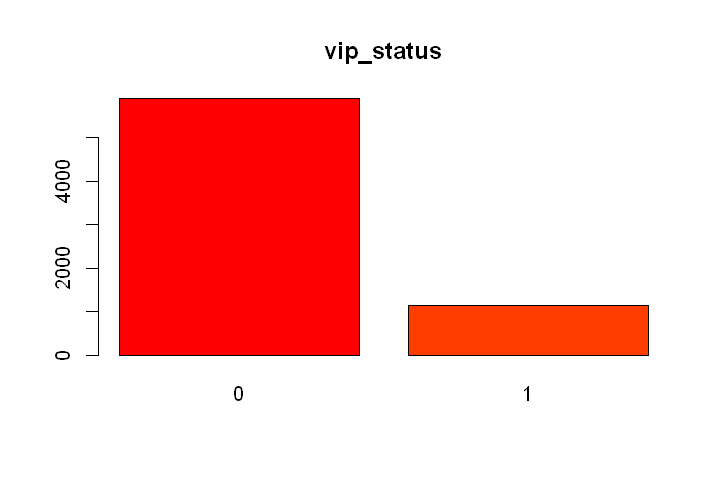

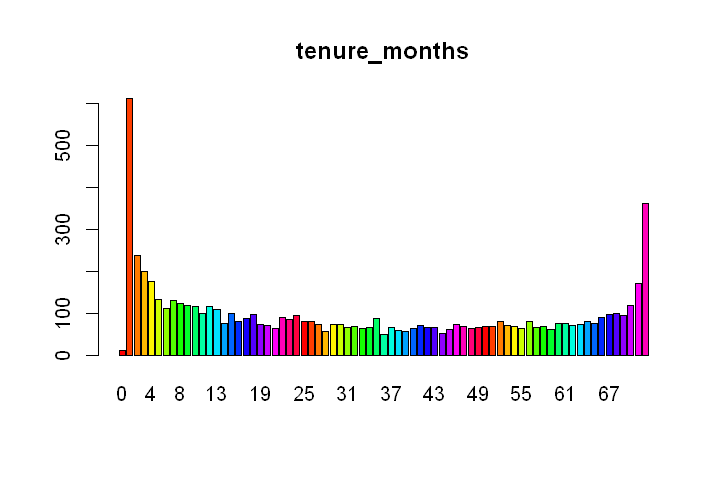

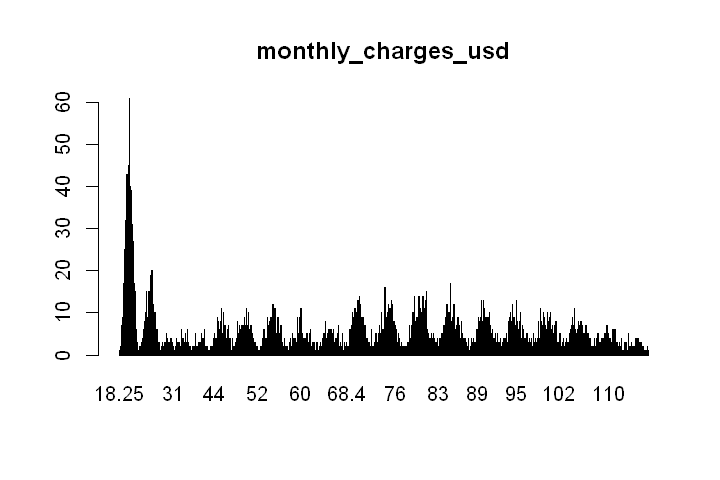

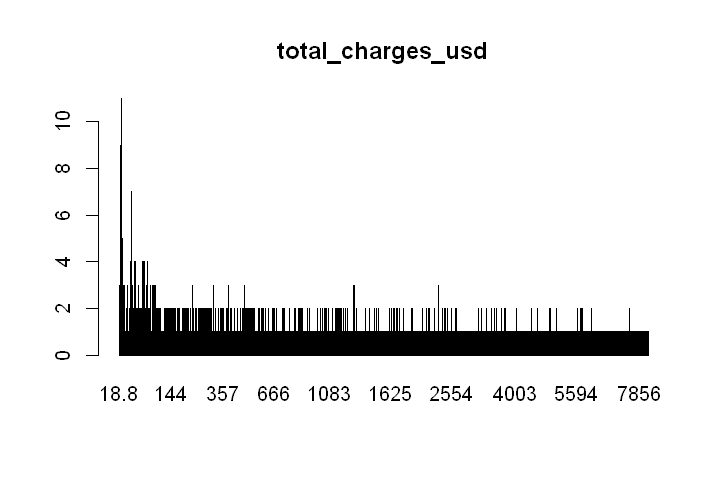

In [17]:
subscriptions_num= subscriptions %>% dplyr::select(where(is.numeric))
attributes = colnames(subscriptions_num)
for(attr in attributes){plot= "barplot(table(subscriptions_num${attr}),col=rainbow(25),main='{attr}',xlab = '')"
                        eval(parse(text=glue(plot)))}

#### Barplot on character columns

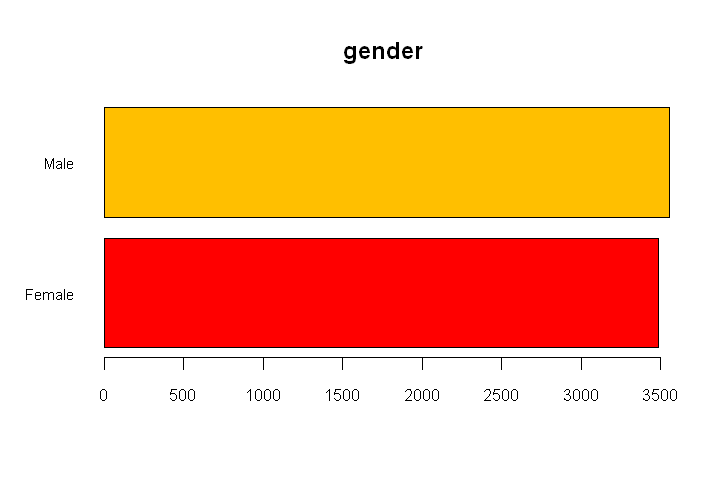

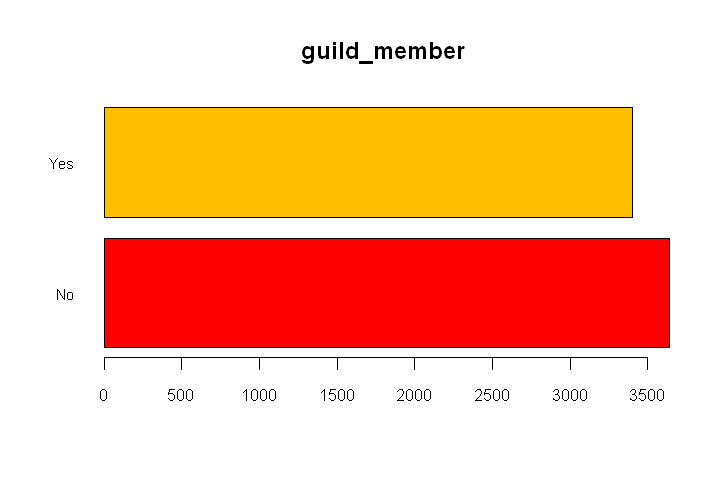

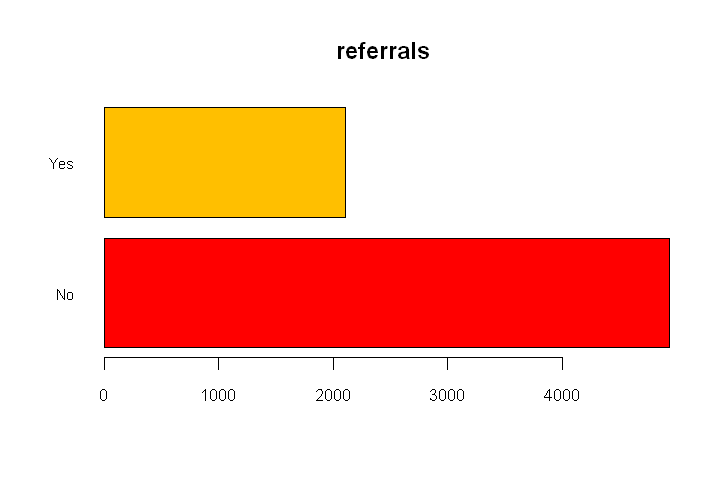

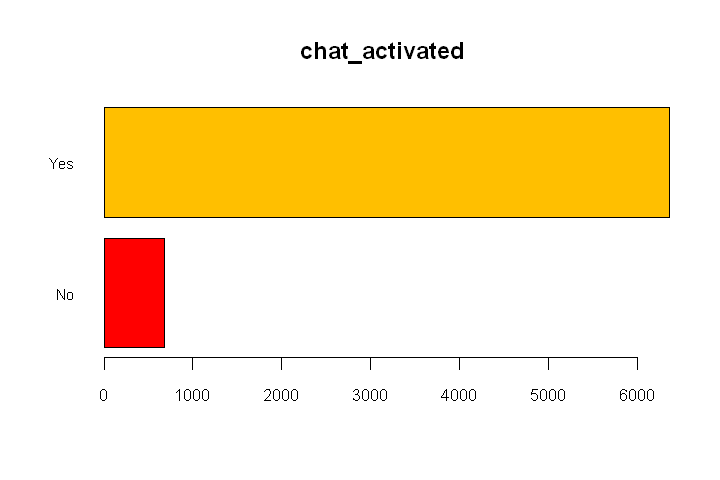

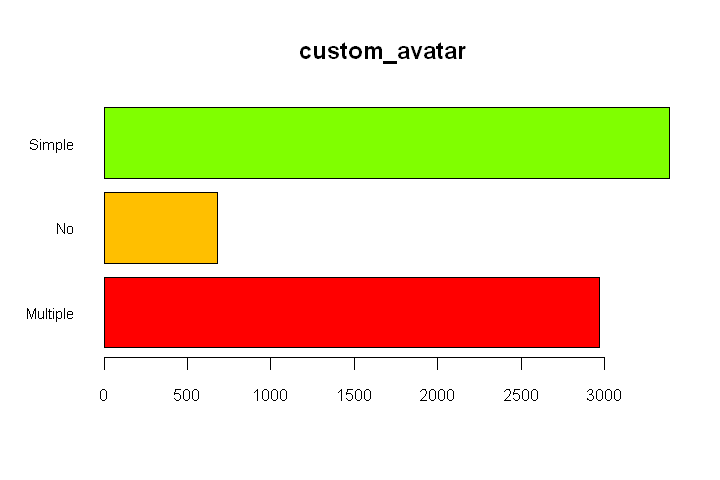

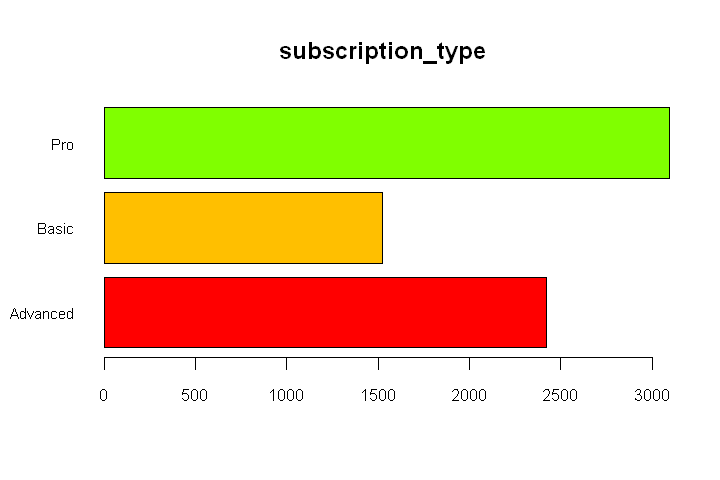

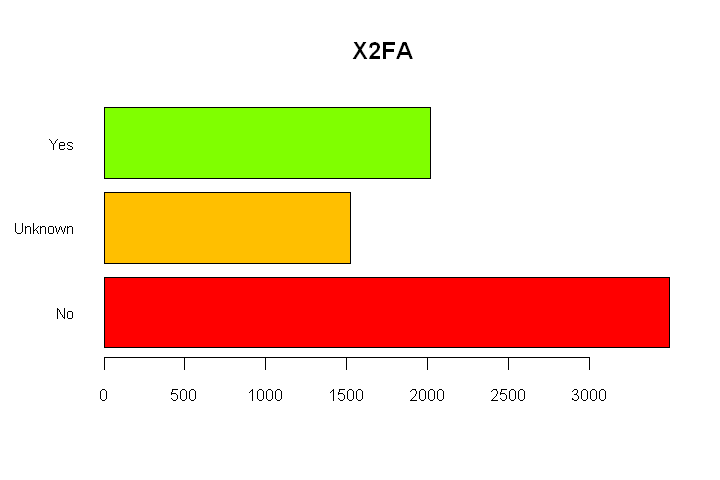

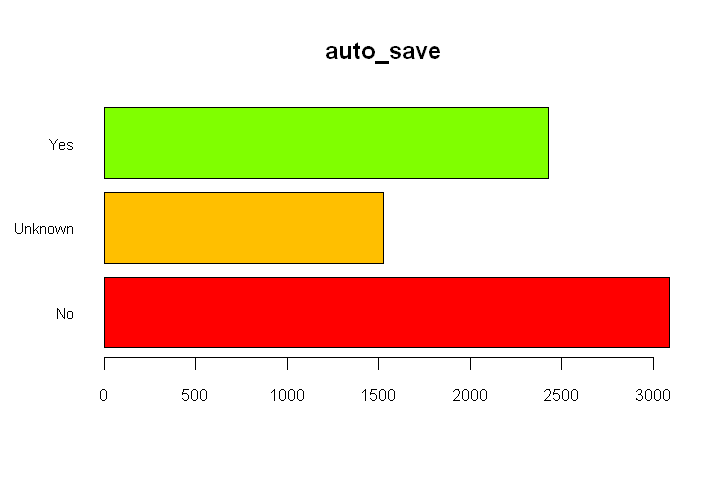

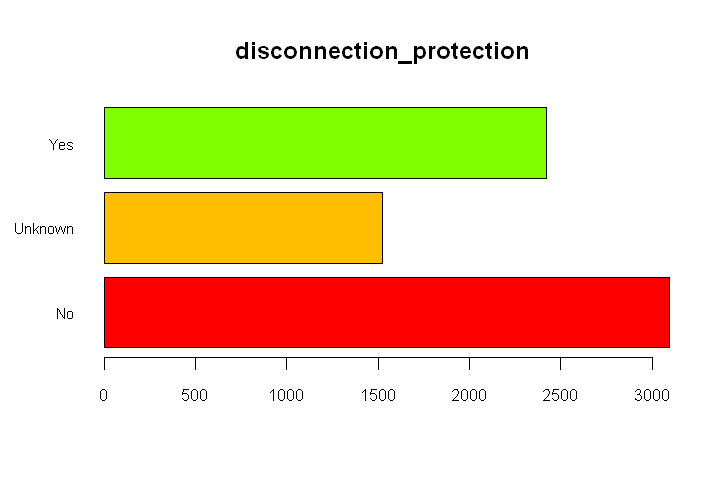

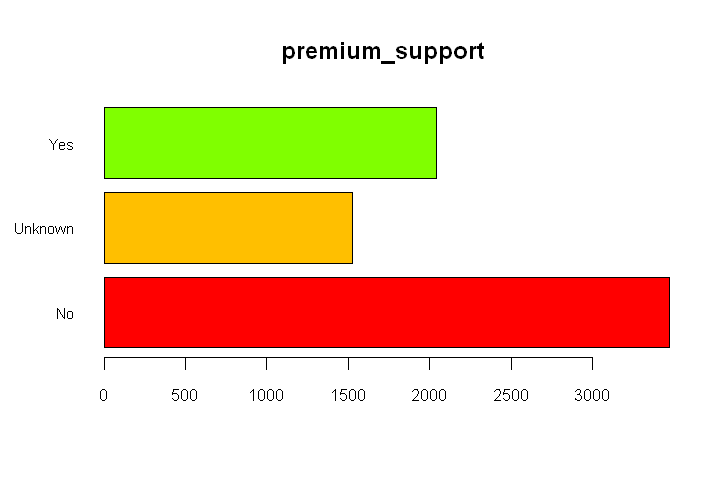

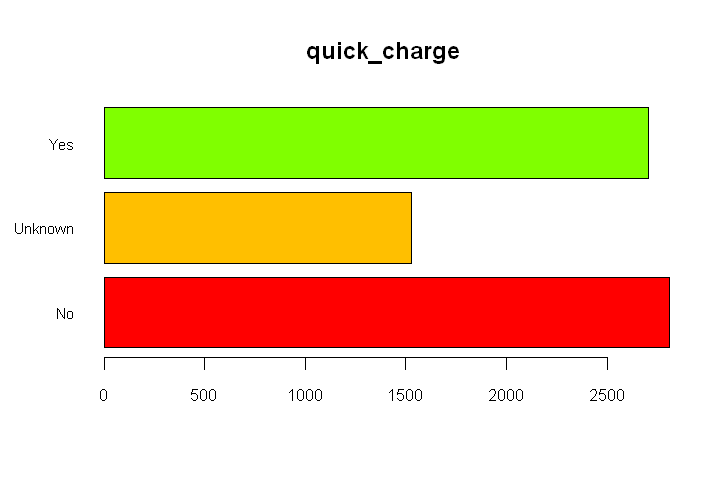

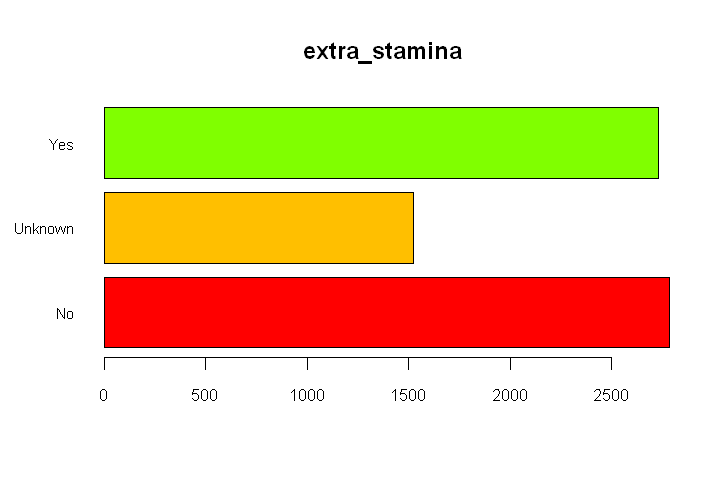

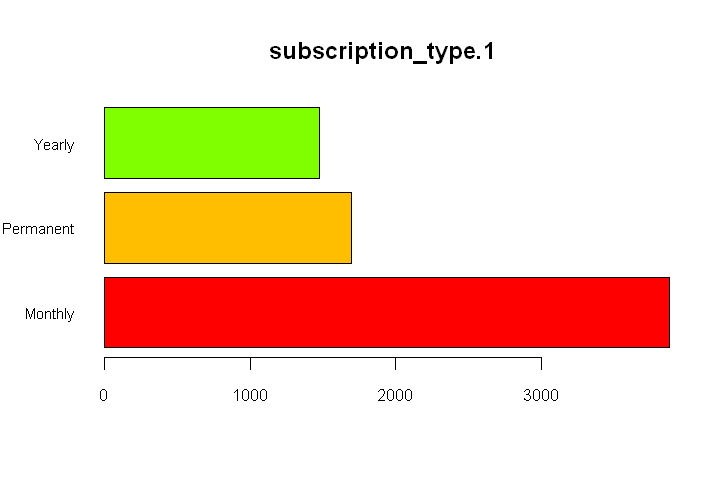

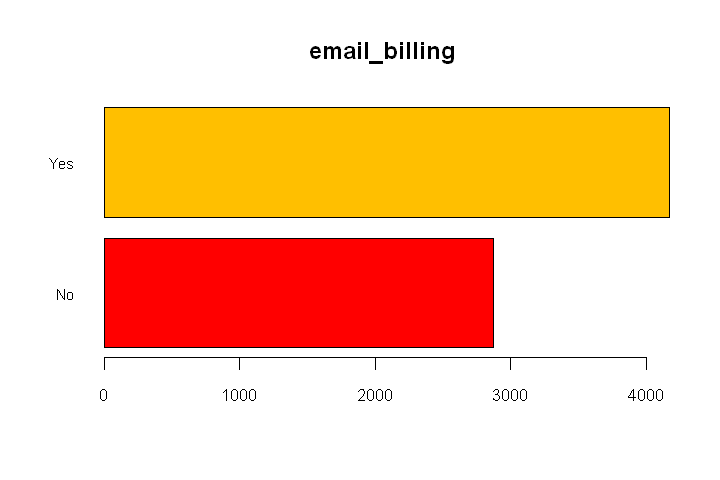

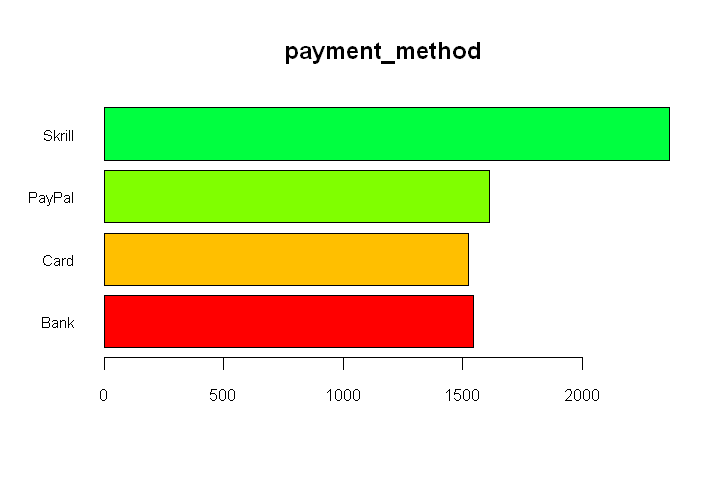

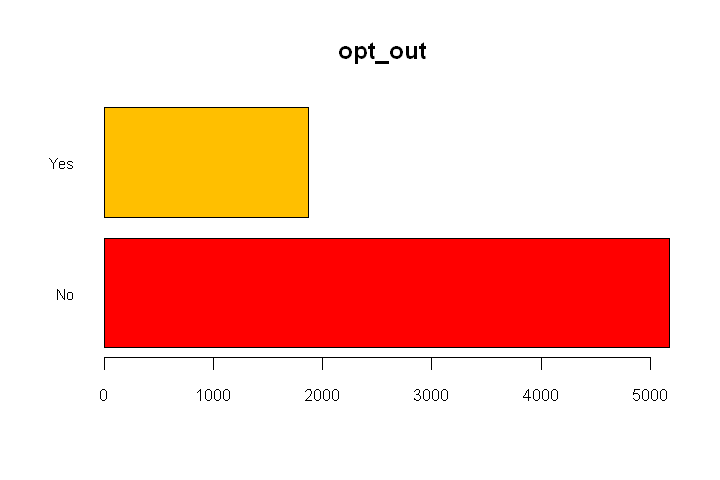

In [18]:
subscriptions_char= subscriptions %>% dplyr::select(where(is.character))
attributes = colnames(subscriptions_char)
for(attr in attributes){plot="barplot(table(subscriptions_char${attr}),col=rainbow(8),main='{attr}',xlab = '', 
                              horiz=T,las=1,cex.names=0.77,cex.axis=0.85)"
                        eval(parse(text=glue(plot)))}

In order to have an idea at what level of relation the attributes have, I proceed to do a correlation test.To do that, I omit the following columns:
- `X2FA`
- `auto_save`
- `disconnection_protection` 
- `premium_support` 
- `quick_charge`  
- `extra_stamina` 

<br>
Because in all of them missing values are contained.  A post analysis should be how to fill them. 

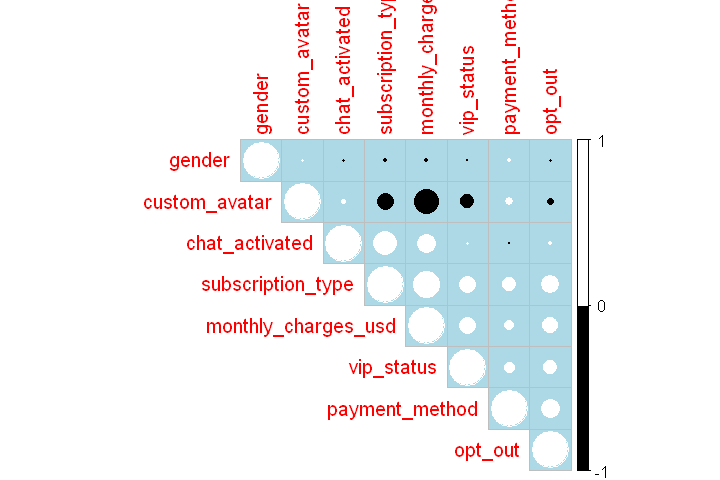

In [19]:
cols = c("gender","custom_avatar","chat_activated","subscription_type",
         "monthly_charges_usd","vip_status","payment_method","opt_out")
subscriptions_analysis = subscriptions  %>% dplyr::select(all_of(cols))
subscriptions_correlacion = sapply(subscriptions_analysis  %>% dplyr::select(where(is.character)),unclass)
subscriptions_correlacion = cbind(subscriptions_correlacion,subscriptions_analysis[,c("vip_status","monthly_charges_usd")])
subscriptions_correlacion = subscriptions_correlacion %>% mutate_if(is.factor, as.numeric)
correlacion=cor(subscriptions_correlacion)
corrplot(correlacion, type="upper", order="hclust", col=c("black", "white"), bg="lightblue")

- `gender` is practically indepedent of the all of attributes.<br>

In favor of the company's profit, I consider the most interesting viewing everything related to `monthly_charges_usd`.  
Looking at the graph, that attribute has a close lineal dependency on `subscription_type` and `custom_avatar`.
That's why I'm almost convinced that the best method to tackle fastly is tree's decision.

In [20]:
cols= cols[-which(cols=="monthly_charges_usd")]
for(col in cols){line= "subscriptions_analysis${col}=as.factor(subscriptions_analysis${col})"
                 eval(parse(text=glue(line)))}

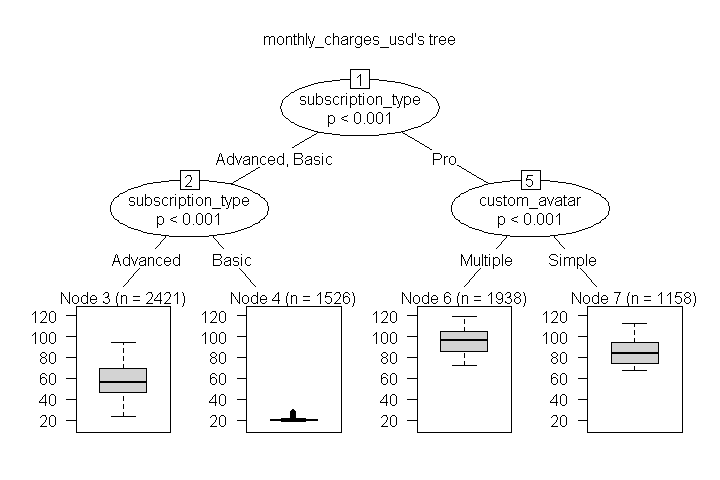

In [21]:
# monthly_charges_usd
tree <- ctree(monthly_charges_usd ~.,data= subscriptions_analysis, maxdepth = 2)
plot(tree, main= "monthly_charges_usd's tree", gp = gpar(fontsize = 9.5))

Indeed the objective attribute depends mainly on those attributes already mencioned and spotted on the correlation graph.<br>
As a result, I set a hierarchy among the clientes in function of the service charged a month as follows:

- **Top clients**: Those who have as `subscription_type` to *Pro* and `custom_avatar` equals *Multiple*,whose median approachs 100 dollars. 
- **2 top clients**: Those who have as `subscription_type` to *Pro* and `custom_avatar` equals *Simple*, whose median is over 80 dollars.

- **3 top clients**: those who have as `subscription_type` to *Advanced*, whose median approachs 60 dollars.
- **Bottom clients**: those who have as `subscription_type` to *Basic*, whose median is over 20 dollars.


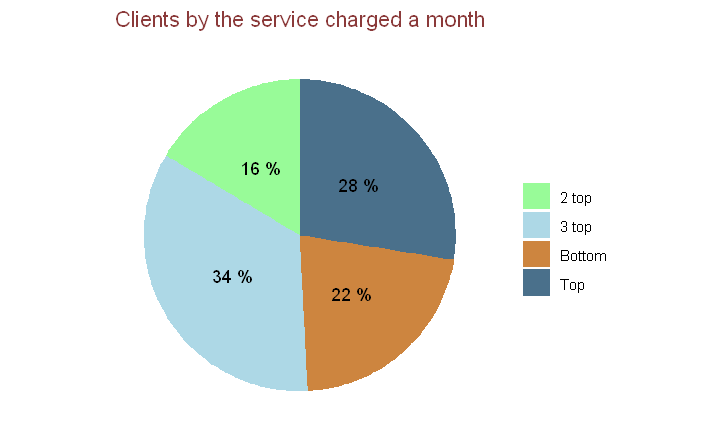

In [22]:
options(repr.plot.width=6,repr.plot.height=3.7)
x <-  c(2421, 1526, 1938,1158)
labels <-  c("3 top","Bottom","Top","2 top")
df = data.frame("Clients" = labels, "nº" = x)
# Create a basic bar
pie = ggplot(df, aes(x="", y=x, fill=Clients)) + geom_bar(stat="identity", width=1)
# Convert to pie (polar coordinates) and add labels
pie = pie + coord_polar("y", start=0) + geom_text(aes(label=paste(round(nº*100/sum(nº)),"%")),
                                                  position=position_stack(vjust=0.5))
# Add color scale (hex colors)
pie = pie + scale_fill_manual(values=c("palegreen", "lightblue", "peru", "skyblue4")) 
# Remove labels and add title
pie = pie + labs(x = NULL, y = NULL, fill = NULL, title = "Clients by the service charged a month")
# Tidy up the theme
pie = pie + theme_classic() + theme(axis.line = element_blank(),axis.text = element_blank(),
            axis.ticks = element_blank(),plot.title = element_text(hjust = 0.5, color = "indianred4"))
pie

The most numerous clients are 3 top's and the less ones are 2 top's

## Solution 3

The queries are done in **mysql**
- Assuming the 3 files are contained in an unique database. 


#### Number of unique users
I assume that in users file, every *id* is unique
```mysql
SELECT country, count(id) AS total_ids FROM users GROUP BY country;  
  ```

#### Number of paying users among users registered this month

````mysql
SELECT country,MONTH(DATE(users.datetime))AS current_month,COUNT(DISTINCT(payments.user_id)) AS total_id FROM 
sessions INNER JOIN users ON users.id=payments.id GROUP BY country HAVING current_month = MONTH(DATE(NOW()));  
````

#### Average daily active users per month
````mysql

SELECT country, AVG(totaldaily_users) AS avgdaily_user, month_year FROM (SELECT country, COUNT(DISTINCT(user_id))) 
AS totaldaily_users,DAY(DATE(sessions.datetime)) AS day, CONCAT_WS('_', MONTH(DATE(sessions.datetime)), 
YEAR(DATE (sessions.datetime))) AS month_year FROM sessions INNER JOIN users ON users.id = payments.id GROUP BY 
country, day, month_year) GROUP BY country,month_year;
````

#### Percentage of users who made their first payment in 3 days after installation
````mysql

SELECT country, COUNT(DISTINCT(payments.id))*100/ COUNT(users.id) AS percentage_3days FROM payments INNER JOIN users ON users.id=payments.id GROUP BY country HAVING DATEDIFF(DAY(DATE(payments.datetime)),DAY(DATE(users.datetime)))<=3; 
````

#### Percentage of users who made their first payment in 3 days after installation and had at least 2 battles in 7 days after installation
````MYSQL
SELECT country, COUNT(DISTINCT(payments.user_id))*100/ COUNT(users.id) AS percentage_users FROM payments INNER JOIN 
users ON users.id=payments.id INNER JOIN sessions ON users.id=sessions.id GROUP BY country 
HAVING DATEDIFF(DAY(DATE(payments.datetime)),DAY(DATE(users.datetime)))<=3 AND 
SUM(IF(event="conquer_land" OR event="fort_assault",1,0))>=2 AND DATEDIFF(DAY(DATE(sessions.datetime)),
DAY(DATE(users.datetime<)))<=7;          
````

#### Average lag (in days) between purchases per user
````mysql
SELECT country, user_id, AVG(DATEDIFF(DAY(DATE(payments.datetime)), LAG(DAY(DATE(payments.datetime)), 1, NULL)OVER(ORDER BY DAY(DATE(payments.datetime)) ASC))), FROM payments INNER JOIN users ON users.id=payments.id GROUP BY country,user_id;  
````